# The SSA Monte Carlo Error Code 

In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm  

# SSA Algorithm

In [6]:
# Gillespie Algorithm Implementation
def gillespie_algorithm(init_state, vectors, propensities, final_time):
    state = np.array(init_state)
    time = 0.0
    times = [time]
    states = [state.copy()]
    
    while time < final_time:
        a = np.array(propensities(state))      # Propensities
        a0 = np.sum(a)                         # Total propensity
        if a0 == 0:
            break
        
        r1, r2 = np.random.random(2) #np.random.uniform(0, 1, 2)
        h = (1 / a0) * np.log(1 / r1)     # Time until next reaction
        cumsum_a = np.cumsum(a)
        vector_index = np.searchsorted(cumsum_a, r2 * a0)
        
        time += h
        state += vectors[vector_index]   # Update state after reaction
        times.append(time)
        states.append(state.copy())
    
    return times, states

# Simulation of the Error Using the Decay reaction as exact solution

In [5]:
# Parameters of the decay reaction
initial_state = [100]                             # X(0)
reaction_vector = [-1,]                         # Decay reaction vector
propensity_function = lambda x: [0.1 * x[0]]      # a_j(X(s))
final_time = 1                                    # Final time
exact_solution = initial_state[0] * np.exp(-0.1 * final_time)  # Exact solution

# Function to run the Gillespie algorithm multiple times
def run_multiple_simulations(initial_state, reaction_vector, propensity_function, final_time, num_simulations):
    ssa_samples = []                              # To store SSA final states
    for _ in range(num_simulations):
        _, states = gillespie_algorithm(initial_state, reaction_vector, propensity_function, final_time)
        ssa_samples.append(states[-2][0])              # Record final state
    # Compute Monte Carlo estimate, error, variance and clt_bound
    mc_estimate = np.mean(ssa_samples)
    error = np.abs(exact_solution - mc_estimate)
    variance=np.sum((ssa_samples- mc_estimate)**2)/(num_simulations-1)
    clt_bound = (1.96 * np.sqrt(variance)) / (np.sqrt(num_simulations))
    return np.array(ssa_samples), error, mc_estimate, variance, clt_bound
    
# Run simulations for different numbers of repetitions
M = np.arange(1000, 15001, 1000)
errors = []                                      # List to store errors for different simulation counts
mc_estimates = []                                # List to store mc_estimates for different simulation counts
variances = []                                   # List to store variances for different simulation counts
clt_bounds = []                                  # List to store clt bounds for different simulation counts
for i in M:
    ssa_samples, error, mc_estimate, variance, clt_bound = run_multiple_simulations(initial_state, 
                    reaction_vector, propensity_function, final_time, i)
    errors.append(error)                         # Append error for each simulation count
    mc_estimates.append(mc_estimate)             # Append mc_estimate for each simulation count 
    variances.append(variance)                   # Append variance for each simulation count 
    clt_bounds.append(clt_bound)                 # Append clt_bound for each simulation count


# Exact Solution and SSA samples

In [7]:
print(exact_solution, ssa_samples)

90.48374180359595 [91 93 88 ... 86 90 89]


# Data for MC_Estimate and Error

In [9]:
pd.DataFrame({
        "M": np.arange(1000, 15000 + 1, 1000),
        "Exact Solution": exact_solution,
        "Monte Carlo Estimate": mc_estimates,
        "Absolute Error": errors,
        "Variance": variances,
        "CLT Bounds": clt_bounds})    

,M,Exact Solution,Monte Carlo Estimate,Absolute Error,Variance,CLT Bounds
0,1000,90.483742,90.509000,0.025258,8.480399,0.180495
1,2000,90.483742,90.506500,0.022758,9.065490,0.131958
2,3000,90.483742,90.560333,0.076592,8.714598,0.105638
3,4000,90.483742,90.521500,0.037758,8.511666,0.090414
4,5000,90.483742,90.457600,0.026142,8.799562,0.082225
5,6000,90.483742,90.430000,0.053742,8.434172,0.073486
6,7000,90.483742,90.481000,0.002742,8.406268,0.067922
7,8000,90.483742,90.483750,0.000008,8.774333,0.064911
8,9000,90.483742,90.539556,0.055814,8.371143,0.059776
9,10000,90.483742,90.472300,0.011442,8.721705,0.057884


# Plot for the Errors

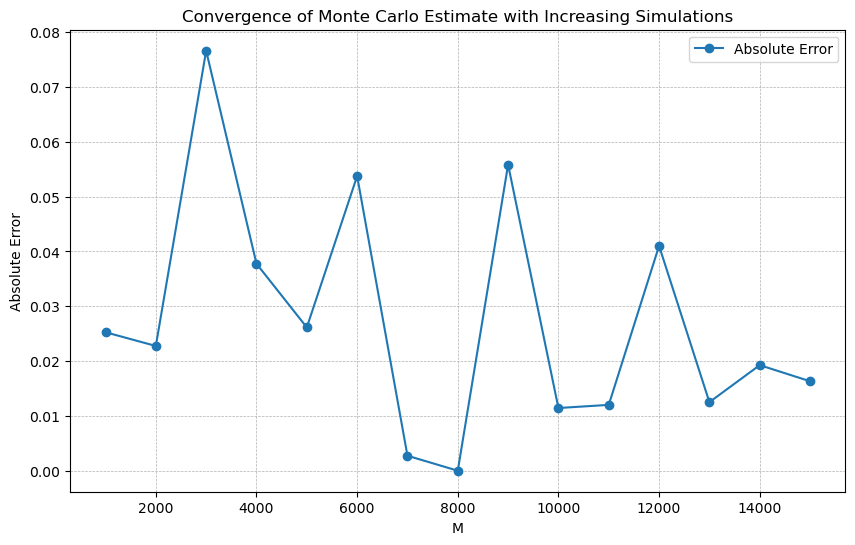

In [11]:
# Plot absolute error over simulation counts
plt.figure(figsize=(10, 6))
plt.plot(M, errors, marker='o', label="Absolute Error")
plt.xlabel("M")
plt.ylabel("Absolute Error")
plt.title("Convergence of Monte Carlo Estimate with Increasing Simulations")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Plot for the CLT Bound

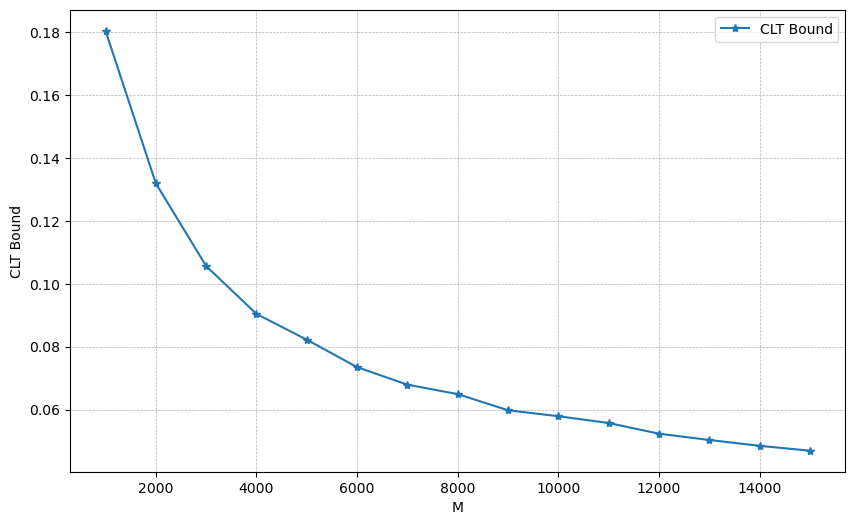

In [13]:
# Plot CLT bound over simulation counts
plt.figure(figsize=(10, 6))
plt.plot(M, clt_bounds, marker='*', label="CLT Bound")
plt.xlabel("M")
plt.ylabel("CLT Bound")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Error and CLT Bound plot with linear scale

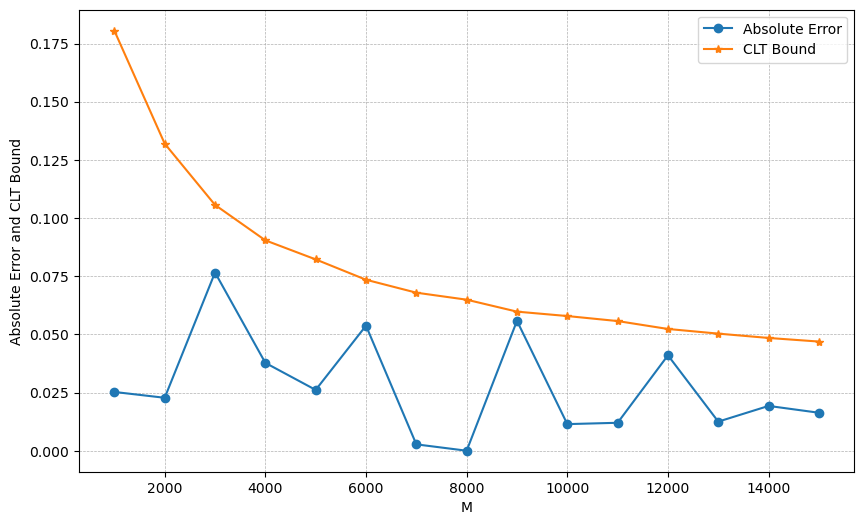

In [15]:
# Plot absolute error and clt bound over simulation counts
plt.figure(figsize=(10, 6))
plt.plot(M, errors, marker='o', label="Absolute Error")
plt.plot(M, clt_bounds, marker='*', label="CLT Bound")
plt.xlabel("M")
plt.ylabel("Absolute Error and CLT Bound")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Error and CLT Bound plot with Loglog scale

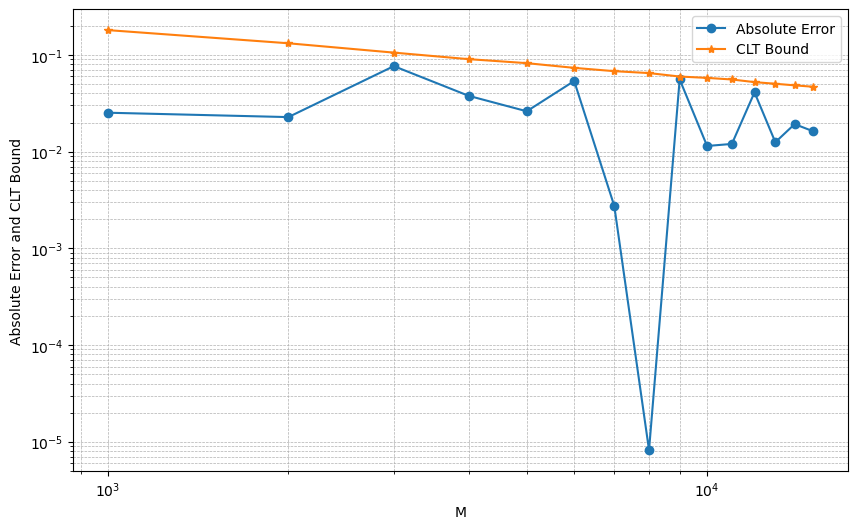

In [17]:
# Plot absolute error and clt bound over simulation counts using Loglog scale
plt.figure(figsize=(10, 6))
plt.loglog(M, errors, marker='o', label="Absolute Error")
plt.loglog(M, clt_bounds, marker='*', label="CLT Bound")
plt.xlabel("M")
plt.ylabel("Absolute Error and CLT Bound")
# plt.title("Convergence of Monte Carlo Estimate with Increasing Simulations")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Slope and Intercept of the CLT Bound

In [19]:
# Fit a linear model to calculate the slope of CLT Bound vs M (log-log scale)
log_M = np.log(M)
log_clt_bound = np.log(clt_bounds)
# print(log_M, log_clt_bound)
slope, intercept = np.polyfit(log_M, log_clt_bound, 1)

# Print the slope of the CLT Bound
print(slope, intercept)

-0.5021882401999859 1.7696365373244782


# Statistical or MC error for multiple runs

# SSA Algorithm

In [16]:
# Parameters of the decay reaction
initial_state = [100]                             # X(0)
reaction_vector = [-1]                            # Decay reaction vector
propensity_function = lambda x: [0.1 * x[0]]      # a_j(X(s))
final_time = 1                                    # Final time
exact_solution = initial_state[0] * np.exp(-0.1 * final_time)  # Exact solution

# Function to run the Gillespie algorithm multiple times
def run_multiple_simulations(initial_state, reaction_vector, propensity_function, final_time, num_simulations):
    ssa_samples = []                              # To store SSA final states
    for _ in range(num_simulations):
        _, states = gillespie_algorithm(initial_state, reaction_vector, propensity_function, final_time)
        ssa_samples.append(states[-2][0])              # Record final state
    # Compute Monte Carlo estimate, error, variance, and clt_bound
    mc_estimate = np.mean(ssa_samples)
    variance=np.sum((ssa_samples- mc_estimate)**2)/(num_simulations-1)
    error = np.abs(exact_solution - mc_estimate)
    clt_bound = (1.96 * np.sqrt(variance)) / np.sqrt(num_simulations)
    return error, mc_estimate, variance, clt_bound

# Function to run experiments for multiple runs
def runs(M, num_runs):
    all_results = {f'Run {j+1}': {'errors': [], 'clt_bounds': []} for j in range(num_runs)}   # A dictionary to store the results for each M & num_runs
    for j in range(num_runs):
        for i in M:
            error, _, _, clt_bound = run_multiple_simulations(initial_state,reaction_vector, propensity_function, final_time, i)
            all_results[f'Run {j+1}']['errors'].append(error)
            all_results[f'Run {j+1}']['clt_bounds'].append(clt_bound)
    return all_results

# Run simulations
M = np.arange(1000, 15001, 1000)  # Simulation counts
num_runs = 5                     # Number of experiment runs
results = runs(M, num_runs)

# Plot of the errors for the multiple runs and the CLT Bound of the last run 

# Linear scale Plot

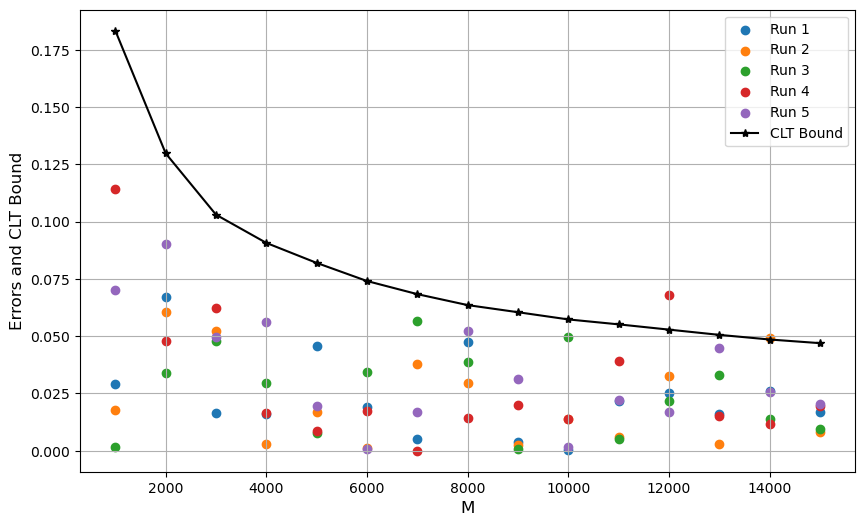

In [18]:
# Plot the errors against M for all runs
plt.figure(figsize=(10, 6))
for run, data in results.items():
    plt.scatter(M, data['errors'], label=run, marker='o')  # Plot errors for each run

# Plot CLT bounds for the first run only
first_run = list(results.keys())[4]
plt.plot(M,results[first_run]['clt_bounds'], label="CLT Bound", color='black', marker='*')

plt.xlabel('M', fontsize=12)
plt.ylabel('Errors and CLT Bound', fontsize=12)
# plt.title('Errors vs Number of Simulations (M)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Log scale plot

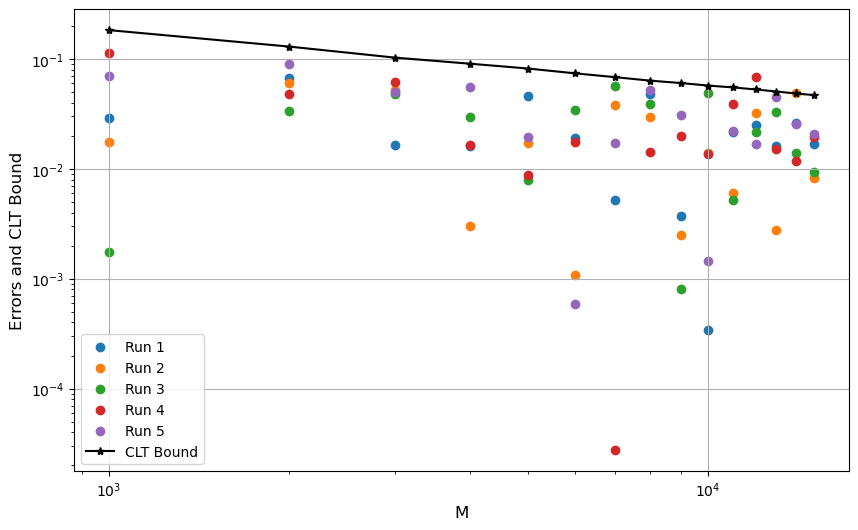

In [22]:
# Plot the errors against M for all runs
plt.figure(figsize=(10, 6))
for run, data in results.items():
    plt.scatter(M, data['errors'], label=run, marker='o')  # Plot errors for each run

# Plot CLT bounds for the first run only
first_run = list(results.keys())[4]
plt.loglog(M, results[first_run]['clt_bounds'], label="CLT Bound", color='black', marker='*')

plt.xlabel('M', fontsize=12)
plt.ylabel('Errors and CLT Bound', fontsize=12)
# plt.title('Errors vs Number of Simulations (M)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()